## 0. Import Packages

In [1]:
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

## 1. MNIST with CNN

In [2]:
mnist = tf.keras.datasets.mnist

training, test = mnist.load_data()

training_img, training_lab = training
test_img, test_lab = test

training_img = np.reshape(training_img, (-1, 28*28))
training_lab = tf.keras.utils.to_categorical(training_lab, 10)

test_img = np.reshape(test_img, (-1, 28*28))
test_lab = tf.keras.utils.to_categorical(test_lab, 10)


training_img = training_img / (np.ones_like(training_img)*255.)
test_img = test_img / (np.ones_like(test_img)*255.)

- https://www.tensorflow.org/get_started/mnist/pros

In [4]:
with tf.Session() as sess:
    x = tf.placeholder(tf.float32, [None, 784])
    y = tf.placeholder(tf.float32, [None, 10])
    x_image = tf.reshape(x, [-1, 28, 28, 1])

  # first Conv. Layer
    W1 = tf.Variable(tf.random_normal([3, 3, 1, 16], stddev=0.1))
    b1 = tf.Variable(tf.random_normal([16], stddev=0.1))

    H_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W1, strides=[1, 1, 1, 1], padding='SAME') + b1)
    H_pool1 = tf.nn.max_pool(H_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

  # second Conv. Layer
    W2 = tf.Variable(tf.random_normal([3, 3, 16, 32], stddev=0.1))
    b2 = tf.Variable(tf.random_normal([32], stddev=0.1))

    H_conv2 = tf.nn.relu(tf.nn.conv2d(H_pool1, W2, strides=[1, 1, 1, 1], padding='SAME') + b2)
    H_pool2 = tf.nn.max_pool(H_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

  # Fully Connected Layer
    W3 = tf.Variable(tf.random_normal([7 * 7 * 32, 256], stddev=0.1))
    b3 = tf.Variable(tf.random_normal([256], stddev=0.1))

    flat = tf.reshape(H_pool2, [-1, 7 * 7 * 32])

    H_fc1 = tf.nn.relu(tf.matmul(flat, W3) + b3)

    W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.1))
    b4 = tf.Variable(tf.random_normal([10], stddev=0.1))

    H = tf.matmul(H_fc1, W4) + b4

    a = 0.001 # learning rate

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=H, labels=y))

    optimizer = tf.train.AdamOptimizer(learning_rate=a)
    train = optimizer.minimize(cost) 

    predicted = tf.equal(tf.argmax(H, 1), tf.argmax(y, 1))    
    accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))
  # Training

    training_epochs = 10
    display_step    = 1
    batch_size = 50


    init = tf.global_variables_initializer()
    sess.run(init)


    for epoch in range(training_epochs):
        average_cost = 0.
        total_batch = int(np.shape(training_img)[0]/batch_size)
    
        for iteration in range(total_batch):
      
            batch_xs = training_img[iteration : iteration + batch_size]
            batch_ys = training_lab[iteration : iteration + batch_size]
            sess.run(train, feed_dict={x: batch_xs, y: batch_ys})
            average_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})/total_batch
          
        if (epoch) % display_step == 0:

            print ("Epoch:", epoch, "cost: ", average_cost)
          
          #  training set accuracy
            training_acc = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys})
            print ("acc:",  training_acc)

          # test set accuracy
            p, pred, test_acc = sess.run([tf.argmax(H, 1), predicted, accuracy], 
                                              feed_dict= {x: test_img, y: test_lab})
            print ("test acc:", test_acc)

    print("Done")

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch: 0 cost:  0.05486788153609582
acc: 1.0
test acc: 0.8921
Epoch: 1 cost:  0.005940549781110653
acc: 1.0
test acc: 0.942
Epoch: 2 cost:  0.000442495418679793
acc: 0.98
test acc: 0.9421
Epoch: 3 cost:  0.0002326497914601574
acc: 1.0
test acc: 0.9588
Epoch: 4 cost:  0.0006619435604233101
acc: 1.0
test acc: 0.9474
Epoch: 5 cost:  0.00017732971527162076
acc: 1.0
test acc: 0.9574
Epoch: 6 cost:  6.412012515689601e-05
acc: 1.0
test acc: 0.947
Epoch: 7 cost:  0.00013128324129236063
acc: 1.0
test acc: 0.9298
Epoch: 8 cost:  4.8016963795850124e-05
acc: 1.0
test acc: 0.9555
Epoch: 9 cost:  3.079442744150874e-06
acc: 1.0
test acc: 0.9574
Done


Target :  8
Pred :  4


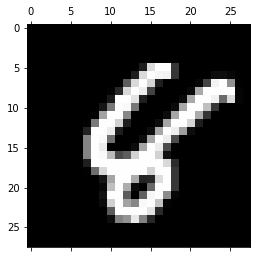

Target :  5
Pred :  1


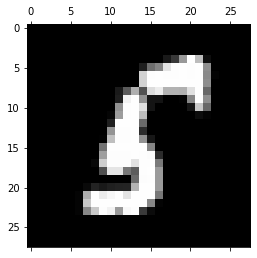

Target :  5
Pred :  8


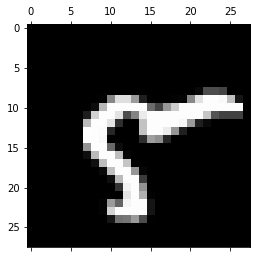

In [6]:
# Check wrong data

random_num = np.random.choice((np.where(pred==False)[0]), size=3)
# print(random_num)
for i in random_num:
    print("Target : ", np.argmax(test_lab[i]))
    print("Pred : ", p[i])
    sample_img = np.reshape(test_img[i],(28,28))
    plt.matshow(sample_img, cmap=plt.get_cmap('gray'))    
    plt.show()